# 数値解析の基礎：10分解説



---

## 数値解析のアプローチ

 - 自然現象や社会現象など世の中の多くの現象は微分方程式によって表すことができる（当然その限りではない）。
 - 数値解析とは微分方程式によってモデル化された現象をコンピュータで取り扱える形にして計算を行なうことを示す。
 - 微分方程式を離散化することにより代数方程式を導出する。離散化手法のうち
 、流体解析でよく使われる**差分法**について説明する

![fig](https://raw.githubusercontent.com/computational-sediment-hyd/NonUniformFlowModelUsingPython/main/00_orientation/ref/p001.svg)


<!-- <img src="https://raw.githubusercontent.com/computational-sediment-hyd/NonUniformFlowModelUsingPython/main/00_orientation/ref/p001.svg" alt="fig" title="fig" width="400"> -->

※ 茨城大学 田中伸厚先生の講義資料を引用 : http://www.mech.ibaraki.ac.jp/~tanaka/Lecture/sim1/part1.pdf


---

## 離散化について -差分法を例に-

ある現象が次の常微分方程式で表すことができるとする。

$$
\dfrac{dN(t)}{dt} = -k N(t)
$$

$k$:定数

上式は連続系でありそのままコンピュータで取り扱うことができない。

そこで上式を

$$
\dfrac{N(t+\Delta t)-N(t)}{\Delta t} = -k N(t)
$$

のようにコンピュータ上で取り扱える式（代数方程式＝四則演算のみの式）に変換することを離散化（差分法）という。


また、代数方程式は添字を用いて以下のように記述することが多い。以降は以下の表記を使用する。

$$
\dfrac{N^{n+1}-N^n}{\Delta t} = -k N^n
$$


---

## 計算例1：放射性物質の崩壊

### 現象

放射性物質の原子核数の時間変化

<!-- <img src="https://i0.wp.com/studyphys.com/wp-content/uploads/2018/12/tiny_half-life_v1.png?resize=1024%2C842&ssl=1" alt="fig" title="fig" width="500">
 -->
![fig](https://i0.wp.com/studyphys.com/wp-content/uploads/2018/12/tiny_half-life_v1.png?resize=1024%2C842&ssl=1)
出典：https://studyphys.com/half-life/


---

### 数学モデル（微分方程式）

以下の常微分方程式で表すことができる。

$$
\dfrac{dN(t)}{dt} = -k N(t)
$$
$k$:崩壊定数

### 数値モデル（代数方程式）

差分法を用いると以下のとおりとなる。

$$
\begin{align}
\dfrac{N^{n+1}-N^n}{\Delta t} &= -k N^n \\
N^{n+1} &=  N^n - \Delta t k N^n
\end{align}
$$

この式より$N^0$の値（初期条件）を与えて逐次計算を行うことにより数値解を得ることができる。



---

### 厳密解

前出の常微分方程式は厳密解（数値計算を用いずに解析的に得られる解。解析解とも呼ばれる）を求めることができる。

導入過程は省略するとが、変数分離を用いて式変形することにより下式が得られる。

$$
N(t) = N^0 e^{-kt}
$$

本式による計算結果と数値計算の結果を比較することにより計算の妥当性を評価することができる。



---

### 計算結果

導出した代数方程式を用いて数値解析を実施する。
$\Delta t$を0.1,0.5,1.0,1.5と変化させた場合の計算結果と厳密解との比較を示す。
計算条件は、$N^0$は100、$k$は1とする。

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N0 = 100
k = 1.0
exact = lambda T: N0 * np.exp(-k*T)

def simulation(T):
    N = np.zeros_like(T)
    N[0] = N0
    for i in range(1, len(N)):
        N[i] = N[i-1] - dt*k*N[i-1] 
    return N

def mkfig(ax, T):
    ax.plot(T, exact(T),label='exact')
    ax.plot(T, simulation(T),label='simulation')
    ax.set_xlabel('T')
    ax.set_ylabel('N')
    ax.legend(loc = 'upper right') 



---

#### $\Delta t = 0.1$の計算結果



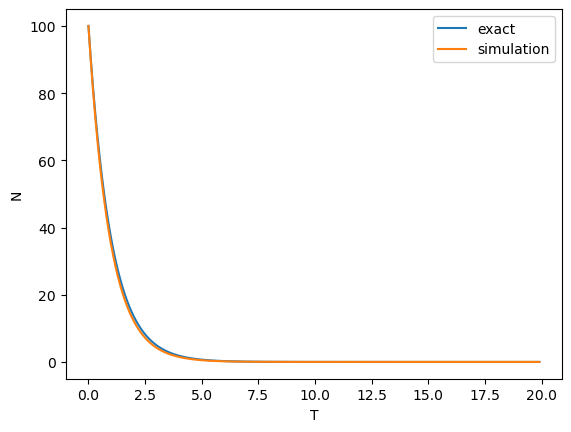

In [2]:
dt = 0.1
T = np.arange(0, 20, dt)
fig, ax = plt.subplots()
mkfig(ax, T)


---

#### $\Delta t = 0.5$の計算結果



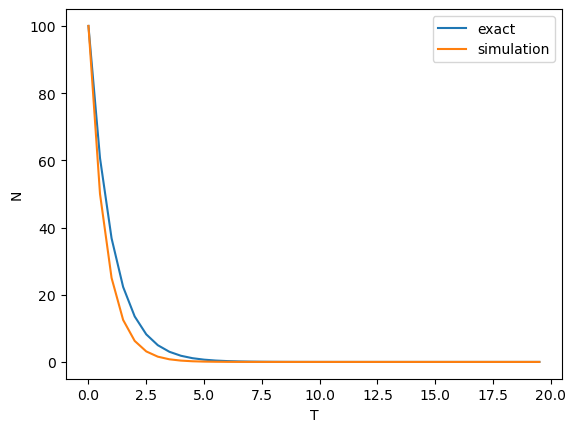

In [3]:
dt = 0.5
T = np.arange(0, 20, dt)
fig, ax = plt.subplots()
mkfig(ax, T)


---

#### $\Delta t = 1.0$の計算結果



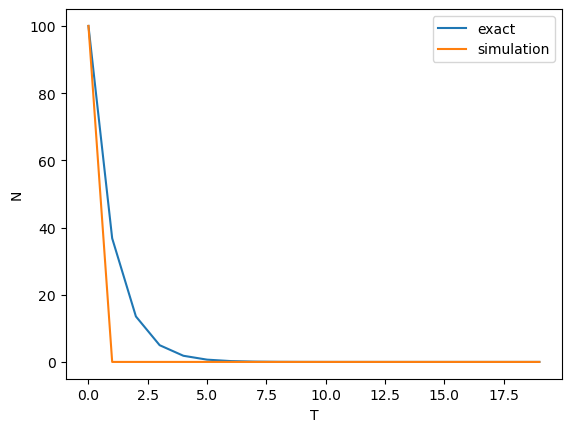

In [4]:
dt = 1.0
T = np.arange(0, 20, dt)
fig, ax = plt.subplots()
mkfig(ax, T)


---

#### $\Delta t = 1.5$の計算結果



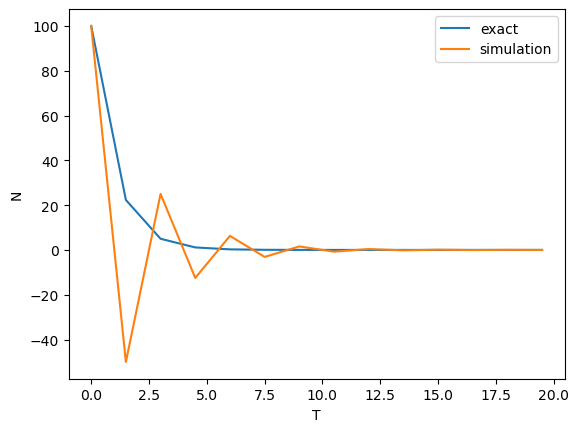

In [5]:
dt = 1.5
T = np.arange(0, 20, dt)
fig, ax = plt.subplots()
mkfig(ax, T)

---

- $\Delta t$によって解析結果が異なる。
 - $\Delta t=0.1$は、厳密解と数値解析による差はほとんどないが、$\Delta t$が大きくなるにつれて差が大きくなる。$\Delta t=1.5$は異常な結果を示している。
 - 差分法では$\Delta t$を小さく設定することが望ましいが、計算資源の制約で限界がある。


---

### 他の差分法

 - 今回はもっと基本的な前進差分スキーム（nの値からからn+1の値を求める）を使用したが、後退差分スキーム（n+1の値からからn+1の値を求める）も存在する。
 - 時間発展の前進差分スキームは陽解法、後退差分スキームは陰解法と呼ばれる。


$$
\begin{align}
\dfrac{N^{n+1}-N^n}{\Delta t} &= -k N^{n+1} \\
N^{n+1} &=  \dfrac{N^n}{1+ \Delta t k}
\end{align}
$$

 - 以下に示す計算結果のとおり、$\Delta t=1.5$でもそれなりの数値計算結果が得られることがわかる。
 - 陰解法はメリットしか無いように思われるが、陰解法では上記のような単純な式形になることは稀であり、ほとんどのケースで複雑な式形になり、数値解を得るために収束計算が必要となる。
 
---

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N0 = 100
k = 1.0
exact = lambda T: N0 * np.exp(-k*T)

def simulation2(T):
    N = np.zeros_like(T)
    N[0] = N0
    for i in range(1, len(N)):
        N[i] = N[i-1]/(1+dt*k)
    return N

def mkfig2(ax, T):
    ax.plot(T, exact(T),label='exact')
    ax.plot(T, simulation2(T),label='simulation')
    ax.set_xlabel('T')
    ax.set_ylabel('N')
    ax.legend(loc = 'upper right') 



---

#### $\Delta t = 1.5$の計算結果



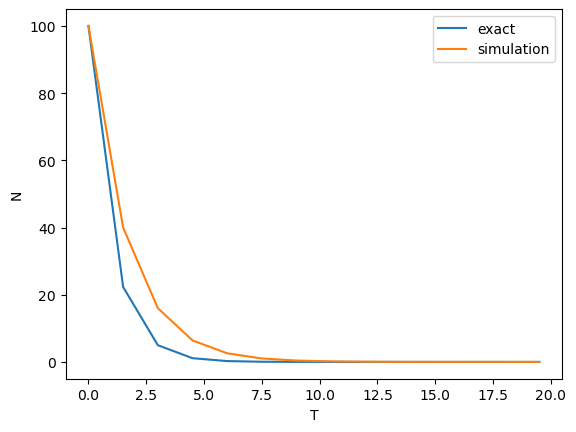

In [7]:
dt = 1.5
T = np.arange(0, 20, dt)
fig, ax = plt.subplots()
mkfig2(ax, T)


---

## 計算例2：移流方程式

### 現象

移流とは下図のようにある物理量が流れによって運ばれる現象を示す。この現象を計算対象とする。

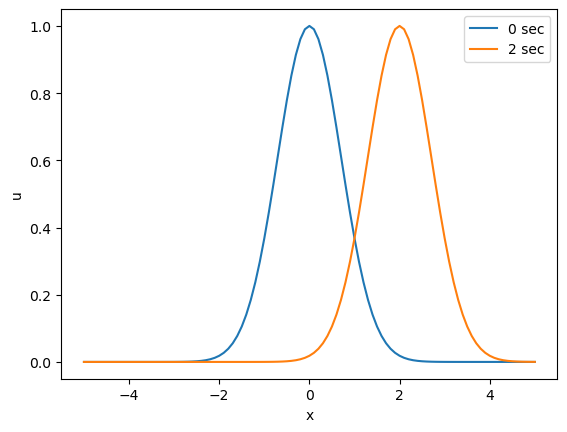

In [8]:
import numpy as np
import matplotlib.pyplot as plt

c = 1.0
X = np.linspace(-5,5,101)
exact = lambda t: np.exp(-(X-c*t)**2)
fig, ax = plt.subplots()

ax.plot(X, exact(0),label='0 sec')
ax.plot(X, exact(2),label='2 sec')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend(loc = 'upper right') 


---

### 数学モデル（微分方程式）

以下の偏微分方程式で表すことができる。

$$
\dfrac{\partial u(t,x)}{\partial t} + c\dfrac{\partial u(t,x)}{\partial x} =0
$$
$c$:速度

### 数値モデル（代数方程式）

今回は3つの差分スキームを使用する。

#### 前進差分

$$
\begin{align}
\dfrac{u^{n+1}_i-u^n_i}{\Delta t} &= -c\dfrac{u^n_{i+1}-u^n_{i}}{\Delta x} \\
u^{n+1}_i &= u^n_i - \dfrac{c\Delta t}{\Delta x}\ (u^n_{i+1}-u^n_{i})
\end{align}
$$

#### 後退差分

$$
\begin{align}
\dfrac{u^{n+1}_i-u^n_i}{\Delta t} &= -c\dfrac{u^n_{i}-u^n_{i-1}}{\Delta x} \\
u^{n+1}_i &= u^n_i - \dfrac{c\Delta t}{\Delta x}\ (u^n_{i}-u^n_{i-1})
\end{align}
$$

--- 

#### 中心差分

$$
\begin{align}
\dfrac{u^{n+1}_i-u^n_i}{\Delta t} &= -c\dfrac{u^n_{i+1}-u^n_{i-1}}{2\Delta x} \\
u^{n+1}_i &= u^n_i - \dfrac{c\Delta t}{\Delta x}\dfrac{u^n_{i+1}-u^n_{i-1}}{2} 
\end{align}
$$

この式より$u^0$の値（初期条件,空間分布を持つ）を与えて逐次計算を行うことにより数値解を得ることができる。
なお、境界条件も必要であるが今回は境界付近を計算しないため0とする。

### 厳密解

一次元の移流方程式は条件によって厳密解を得ることができる。
$u(0,x)=e^{-x^2}$を与えると厳密解として次式が得られる。

$$
u(t,x) = e^{-(x-ct)^2}
$$



---

### 計算結果

導出した代数方程式を用いて数値解析を実施する。
計算条件は、$c=1$、$\Delta t=0.1$、$\Delta t=0.01$として、厳密解との比較を行なう。

In [9]:
import numpy as np
import matplotlib.pyplot as plt

c = 1.0
X = np.linspace(-5,5,101)
dx = 0.1
exact = lambda t: np.exp(-(X-c*t)**2)

---

In [10]:
def s01(dt): #前進差分
    unew = exact(0)
    for _ in range(int(2/dt)):
        u = unew.copy()
        for i in range(1,len(u)-1):
            unew[i] = u[i] - c * dt/dx * (u[i+1]-u[i])
    return unew

def s02(dt): #後退差分
    unew = exact(0)
    for _ in range(int(2/dt)):
        u = unew.copy()
        for i in range(1,len(u)-1):
            unew[i] = u[i] - c * dt/dx * (u[i]-u[i-1])
    return unew

def s03(dt): #中心差分
    unew = exact(0)
    for _ in range(int(2/dt)):
        u = unew.copy()
        for i in range(1,len(u)-1):
            unew[i] = u[i] - c * dt/dx * (u[i+1]-u[i-1])/2
    return unew

---

#### 前進差分

適切な解を得ることができない。

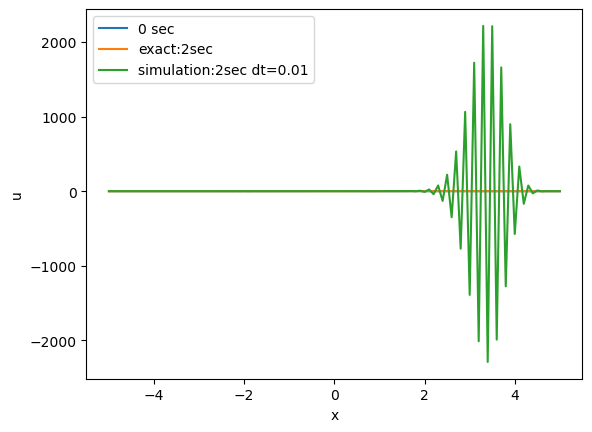

In [11]:
fig, ax = plt.subplots()
ax.plot(X, exact(0),label='0 sec')
ax.plot(X, exact(2),label='exact:2sec')
ax.plot(X, s01(0.01),label='simulation:2sec dt=0.01')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend(loc = 'best') 

---

#### 後退差分

波形が拡散してピークが減衰する。

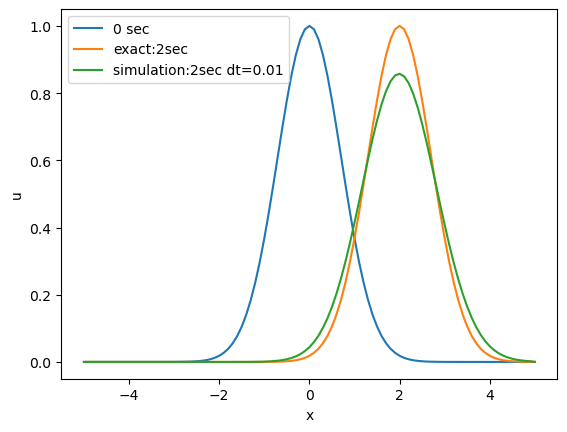

In [12]:
fig, ax = plt.subplots()
ax.plot(X, exact(0),label='0 sec')
ax.plot(X, exact(2),label='exact:2sec')
ax.plot(X, s02(0.01),label='simulation:2sec dt=0.01')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend(loc = 'best') 

---

#### 中心差分

若干の差異はあるが他の差分スキームと比較すると厳密解に近い結果になっている。

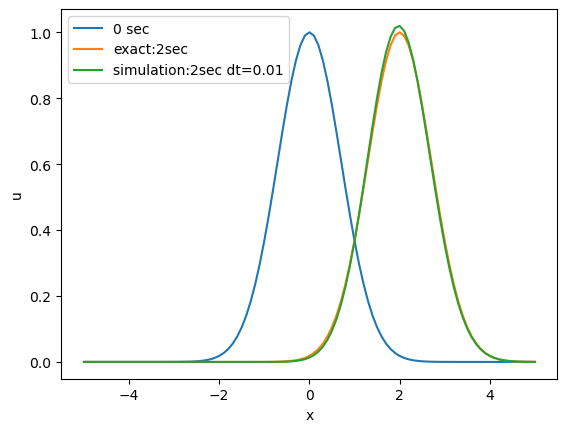

In [13]:
fig, ax = plt.subplots()
ax.plot(X, exact(0),label='0 sec')
ax.plot(X, exact(2),label='exact:2sec')
ax.plot(X, s03(0.01),label='simulation:2sec dt=0.01')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend(loc = 'best') 

---
- 差分スキームによって解析結果が異なる。
 - 前進差分は$\Delta t$をいくら小さくしても適切な解を得ることができない。
 - 後退差分は拡散するため、$\Delta t, \Delta x$を十分に小さくとる必要がある。
 - 今回のケースでは中心差分が良さそうであるが、適切な解が得られない場合が多い。（発散し易い。）
 - その場合、より高精度なスキームが必要となり代数方程式の導出が複雑となる。⇒ 不定流計算などでは煩雑な代数方程式が必要

---

### 陰解法

一次元移流方程式の陰解法は前出の常微分方程式と比べてかなり複雑な式形となる。

例として陰解法で中心差分の代数方程式を導出すると次式となる。

$$
\begin{align}
\dfrac{u^{n+1}_i-u^n_i}{\Delta t} &= -c\dfrac{u^{n+1}_{i+1}-u^{n+1}_{i-1}}{2\Delta x} \\
u^{n+1}_i + \dfrac{c\Delta t}{\Delta x}\dfrac{u^{n+1}_{i+1}-u^{n+1}_{i-1}}{2} &= u^n_i 
\end{align}
$$

上式のみでは、$n+1$の項の値を求めることができない。そのため、他の空間離散点（$i,i+1,i+2$など）の式を全て連立させた次式より解を計算する。


---

$$
\begin{pmatrix}
\ddots & \ddots & &  &  \\
\dfrac{c\Delta t}{2\Delta x} & 1 & -\dfrac{c\Delta t}{2\Delta x} &  & \huge{0} \\
& \dfrac{c\Delta t}{2\Delta x} & 1 & -\dfrac{c\Delta t}{2\Delta x} &   \\
\huge{0} &  & \dfrac{c\Delta t}{2\Delta x} & 1 & -\dfrac{c\Delta t}{2\Delta x}  \\
& & & \ddots  & \ddots
\end{pmatrix}
\begin{pmatrix}
\vdots \\
 u^{n+1}_{i+1} \\
 u^{n+1}_i \\
 u^{n+1}_{i-1} \\
\vdots
\end{pmatrix}
=
\begin{pmatrix}
\vdots \\
 u^{n}_{i+1} \\
 u^{n}_i \\
 u^{n}_{i-1} \\
\vdots
\end{pmatrix}
$$

左辺の対角行列の逆行列を計算することにより、$n+1$の項を求めることができる。

ここでは計算は省力するが、陰解法は陽解法と比べて煩雑な計算が必要となることが理解できる。

補足として、上式の左辺の1つ目の行列は三重対角行列となっており、TDMA法を用いて少ない計算ステップ数で逆行列を求めることができる。この方法は不等流計算の平均流速公式レベル3の解法でも使用する。

---

## 離散化方法のポイント

一般的に精度と安定性は両立しない。目的に応じて差分スキームを選択する必要がある。


### 精度

 - 離散化による打ち切り誤差の大きさ(○次精度のスキームなどと呼ぶ)

### 安定性

 - 計算誤差が時間の経過とともに発展しないこと。
    - 中心差分は計算誤差が発展しやすく不安定なスキームである。
    - 陰解法は安定性が高い。



---

## まとめ

 - 数値解析は微分方程式を差分法などにより離散化した代数方程式から数値解を得ることである。
 - 差分法では、$\Delta x, \Delta t$の大きさによって解析結果が大きく異なるため、適切な条件設定が必要である。
 - 差分法には様々な方法（スキーム）があり、目的に応じた選択が必要である。

 ⇒ 今回の勉強で実施する不等流計算、貯留関数法では、差分スキームはそれほど重要ではないが$\Delta$の大きさについてはある程度考慮する必要がある。
 
 ⇒ 不定流計算などを実施する場合は、差分スキームが重要